In [2]:
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from os import getcwd
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import Image
%matplotlib inline    

data_dir = os.path.join(getcwd(), 'Corpus')
data_dir

'D:\\NUS Masters\\Sem2\\Sentiment Mining\\CA\\Corpus'

In [22]:
sgyelp_dir = os.path.join(data_dir, 'YelpReview_SG.csv')
SG_DF = pd.read_csv(sgyelp_dir, encoding='iso-8859-1')

print("Total size: {}".format(len(SG_DF)))

SG_DF.sample(n=5)

Total size: 1243


,Unnamed: 0,url,restaurant_name,biz_id,restaurant_address,country,restaurant_area,longitude,latitude,listed_category,overall_review,username,user_location,friend_count,review_count,user_overall_rating,review_date,user_review
386,386,https://www.yelp.com/biz/Fat-Cow-Singapore,Fat Cow,l5lEOq47ne-jWKl67VKwZA,"1 Orchard Boulevard, Singapore 248649",Singapore,Tanglin,103.823715,1.303152,"Japanese, Steakhouses",29 reviews,Eddy X.,"Singapore, Singapore",31,2,4,24/1/2018,"Very good in food, service, environment. Not d..."
570,570,https://www.yelp.com/biz/Hill-Street-Tai-Hwa-P...,Tai Wah Pork Noodle,j_aIYB4uGOR45jAXivFNZQ,"466 Crawford Lane, Singapore 190465",Singapore,Lavender,103.862343,1.305307,"Chinese, Noodles",72 reviews,Princess M.,"New York, NY",33,337,5,31/7/2014,Totally worth the wait and everytime I've been...
799,799,https://www.yelp.com/biz/Man-Fu-Yuan-Singapore,Man Fu Yuan,1eIG4rTx_qFlH7Rm-C5u3A,"80 Middle Rd, Singapore 188966",Singapore,Bugis,103.855669,1.299430,Dim Sum,10 reviews,Mark D.,"Sacramento, CA",540,790,2,13/8/2013,This is a review of a dinner with a friend at ...
1136,1136,https://www.yelp.com/biz/Whole-Earth-Singapore,Whole Earth,gQVBGe7A45rXgV6NL7X_mg,"76 Peck Seah St, Singapore 079331",Singapore,Tanjong Pagar,103.844759,1.277253,"Thai, Vegetarian",26 reviews,Natalie K.,"New York, NY",588,362,5,20/7/2018,Amazing vegan peranakan food! Almost 100% vega...
143,143,https://www.yelp.com/biz/Burnt-Ends-Singapore,Burnt Ends,vVqxGrqt5ALxQjJGnntpKQ,"20 Teck Lim Rd, Singapore 088391",Singapore,Chinatown,103.841807,1.280520,"Australian, Steakhouses, Barbeque",55 reviews,Doreen T.,"Singapore, Singapore",67,614,4,26/12/2016,The restaurant was tiny in size with about 19 ...


<h3>VADER Sentiment Analysis</h3>
<br>
A lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
<br>
Reference:<br>
https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [23]:
analyser = SentimentIntensityAnalyzer()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def break_into_sentences(doc):
    return tokenizer.tokenize(doc)

def sentiment_score(sentence, to_print=True):
    score = analyser.polarity_scores(sentence)
    if to_print:
        print("{:-<40} {}".format(sentence, score))
    else:
        return score

<h3>Exloring VADER library and types of sentiment it can handle</h3>

![Image of Sentiment Score](https://cdn-images-1.medium.com/max/1600/1*G8yV2iaqqfaGfmRPRem2Fw.png)

In [25]:
sentiment_score("I am an ass.")

I am an ass.---------------------------- {'neu': 0.364, 'pos': 0.0, 'compound': -0.5423, 'neg': 0.636}


<b>Punctuation:</b> Exclamation mark(!), increases the magnitude of sematic. Number of (!) incease the magnitude accordingly.

In [24]:
sentiment_score("This chicken rice is really good!")
sentiment_score("This chicken rice is really good!!!")

This chicken rice is really good!------- {'neg': 0.0, 'pos': 0.411, 'neu': 0.589, 'compound': 0.54}
This chicken rice is really good!!!----- {'neg': 0.0, 'pos': 0.449, 'neu': 0.551, 'compound': 0.6211}


<b>Capitalization:</b> Using upper case letters to emphasize sentiment of relevant word will increase the magnitude. <br>
<b>Impactful word:</b> Use a more intensive word will also increase sentiment magnitude.<br>

In [30]:
sentiment_score("This chicken rice is extremely fantastic!")
sentiment_score("This chicken rice is EXTREMELY fantastic!")

This chicken rice is extremely fantastic! {'neg': 0.0, 'pos': 0.456, 'neu': 0.544, 'compound': 0.6352}
This chicken rice is EXTREMELY fantastic! {'neg': 0.0, 'pos': 0.496, 'neu': 0.504, 'compound': 0.7112}


<b>Conjunctions:</b> Use of conjunctions like "but" shift the sentiment polarity.<br>
<b>Slangs:</b> Uses of slang can be accepted by the package.<br>
<b>Emojis:</b> VADER can handles both slangs and emojis.

In [25]:
sentiment_score("This chicken rice is EXTREMELY good but service sux.")
sentiment_score("This chicken rice is really good. 😄")

This chicken rice is EXTREMELY good but service sux. {'neg': 0.256, 'pos': 0.194, 'neu': 0.551, 'compound': -0.1991}
This chicken rice is really good. 😄----- {'neg': 0.0, 'pos': 0.529, 'neu': 0.471, 'compound': 0.839}


<h3>Converting rating to positive or negative sentiment.</h3> <br>
Negative: 1-3 <br>
Positive: 4-5 <br>

In [24]:
sentiment = []
sentiment_threshold = 3

for idx, doc in SG_DF.iterrows():
    if doc['user_overall_rating'] <= sentiment_threshold:
        sentiment.append(-1)
    else:
        sentiment.append(1)

SG_DF['sentiment'] = sentiment
len(SG_DF)

1243

<h3>Exploring dataset</h3>
To have a better understanding on what we are working on. Some exploration is required.<br>
This dataset have more than 2x more positive than negative comments.<br>
Top 3 categories with most comments are:<br>
('Chinese', 267), ('Asian Fusion', 154), ('Noodles', 148)

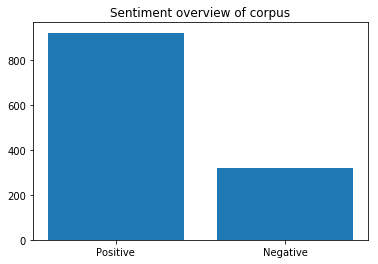

In [46]:
# Visualise number of positive and negative reviews
neg = [doc for idx, doc in SG_DF.iterrows() if doc['user_overall_rating'] <= sentiment_threshold]
pos = [doc for idx, doc in SG_DF.iterrows() if doc['user_overall_rating'] > sentiment_threshold]
plt.title("Sentiment overview of corpus")
plt.bar(['Positive', 'Negative'], [len(pos), len(neg)])
plt.show()

<h3> What is in 3 stars rating</h3>

3 Stars rating holds a mixture positive and negative rating. Most user give 3 stars rating with a relative positive comments.


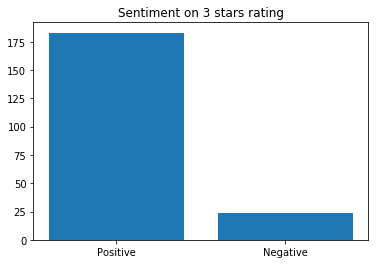

In [47]:
# Ignoring all 3 star rating
rating3 = []
pred_rate3 = []
FILTERED_SG_DF = SG_DF[(SG_DF['user_overall_rating'] == 3)]

for idx, row in FILTERED_SG_DF.iterrows():
    score = sentiment_score(row['user_review'], to_print=False)
    score = score['compound']
    if score < 0.05:
        pred_rate3.append(-1)
    else:
        pred_rate3.append(1)

neg = len([i for i in pred_rate3 if i == -1])
pos = len([i for i in pred_rate3 if i == 1])

plt.title("Sentiment on 3 stars rating")
plt.bar(['Positive', 'Negative'], [pos, neg])
plt.show()

In [26]:
# Get all unique categories in dataset
unique_categories = []
for idx, doc in SG_DF.iterrows():
    for cat in doc['listed_category'].split(','):        
        unique_categories.append(cat.strip())

unique_categories = set(unique_categories)
print("unique_categories: {}".format(len(unique_categories)))
print(unique_categories)
print()

# Count the total number comments on each categories.
# Note that categories will overlap.
rest_category = dict.fromkeys(unique_categories, 0)
for idx, doc in SG_DF.iterrows():
    for cat in doc['listed_category'].split(','):
        cat = cat.strip()
        rest_category[cat] += 1

rest_category = sorted(rest_category.items(), key=lambda k: k[1], reverse=True)
print(rest_category)

unique_categories: 49
{'Japanese', 'Chinese', 'French', 'Italian', 'Cocktail Bars', 'Food Stands', 'Noodles', 'Farmers Market', 'Street Vendors', 'Soup', 'Venues & Event Spaces', 'Thai', 'Vegetarian', 'Ramen', 'Spanish', 'Steakhouses', 'Bakeries', 'Nasi Lemak', 'Imported Food', 'Pakistani', 'Local Flavor', 'Seafood', 'Breakfast & Brunch', 'Mediterranean', 'Food', 'Dim Sum', 'Shanghainese', 'Bars', 'Lounges', 'Asian Fusion', 'Mexican', 'Sushi Bars', 'Ice Cream & Frozen Yogurt', 'Cantonese', 'Singaporean', 'American (Traditional)', 'Fondue', 'Gelato', 'Indian', 'Restaurants', 'Barbeque', 'Szechuan', 'Malaysian', 'Australian', 'Modern European', 'Brasseries', 'Wine Bars', 'Cafes', 'Tapas/Small Plates'}

[('Chinese', 267), ('Asian Fusion', 154), ('Noodles', 148), ('Steakhouses', 136), ('Singaporean', 125), ('French', 106), ('Indian', 102), ('Spanish', 79), ('Japanese', 67), ('Australian', 67), ('Food Stands', 56), ('Barbeque', 55), ('Thai', 53), ('Italian', 50), ('American (Traditional)', 

<h3>Measuring VARDER performance</h3>
Using VARDER package and to predict sentiment value for each comment.<br>

![Compound score metric](https://cdn-images-1.medium.com/max/1600/1*G8yV2iaqqfaGfmRPRem2Fw.png)<br>
VARDER provides neutral category, for fitting our needs to either positive or negative. Neutral category will be label as negative. We will be using the compound score.

In [49]:
# converting predicted value to either positive or negative
pred_scores = []
for idx, doc in SG_DF.iterrows():
    score = sentiment_score(doc['user_review'], to_print=False)
    score = score['compound']
    if score < 0.05:
        pred_scores.append(-1)
    else:
        pred_scores.append(1)
        
SG_DF['pred_sentiment'] = pred_scores
SG_DF.sample()

,Unnamed: 0,url,restaurant_name,biz_id,restaurant_address,country,restaurant_area,longitude,latitude,listed_category,overall_review,username,user_location,friend_count,review_count,user_overall_rating,review_date,user_review,sentiment,pred_sentiment
842,842,https://www.yelp.com/biz/New-World-Mutton-Soup...,New World Mutton Soup,ooey0SsVFEPvCT7Bol8ycQ,"Bedok Interchange Food Centre, Singapore 460207",Singapore,Bedok North,103.930374,1.325297,Street Vendors,4 reviews,Huiyin S.,"Singapore, Singapore",5,230,4,29/7/2012,This store has been around since I was a young...,1,1


In [50]:
actuals = SG_DF['sentiment']
pred = SG_DF['pred_sentiment']

confm = pd.crosstab( pd.Series(actuals), pd.Series(pred), rownames= ['actuals'], colnames=['pred'],margins=True)
confm

pred,-1,1,All
actuals,,,
-1,72,248,320
1,29,894,923
All,101,1142,1243


Precision defines how accurately we can identify True Positive examples.
$$
 Precision = \frac{T_P}{T_P+F_P} 
$$ 

Recalls defines how complete we can identify all the True Positive examples.
$$
 Recall =  \frac{T_P}{T_P+F_n}
$$

Specificity defines how accurately we can identify True Negative examples.
$$
Specificity = \frac{T_N}{T_N+F_P}
$$

F1 is a measure that combine precision and recall.
$$
 F1 =  2*\frac{Precision*Recall}{Precision+Recall}
$$

In [29]:
print("TP: {}".format(confm[1][1]))
print("FP: {}".format(confm[1][-1]))
print("FN: {}".format(confm[-1][1]))
print("TN: {}".format(confm[-1][-1]))
print()

precision = (confm[1][1]) / (confm[1][1] + (confm[1][-1]))
print ("Precision: {}".format(str(round(precision, 3))))

recall = (confm[1][1]) / (confm[1][1] + (confm[-1][1]))
print ("Recall: {}".format(str(round(recall, 3))))

specificity = (confm[-1][-1] / (confm[-1][-1] + confm[1][-1]))
print ("Specificity: {}".format(str(round(specificity, 3))))

f1 = 2 * ((precision * recall) / (precision + recall))
print("F1: {}".format(str(round(f1, 3))))

TP: 894
FP: 248
FN: 29
TN: 72

Precision: 0.783
Recall: 0.969
Specificity: 0.225
F1: 0.866


Specificity performs poorly because majority of 3 stars rating contain positive comment. Relabel 3 stars rating comment or even removed 3 stars rating could improve specificity result.

In [103]:
# saving current dataframe into csv
file_name = os.path.join(data_dir, "YelpReview_SG_new.json")
if not os.path.exists(file_name):
    SG_DF.to_json(file_name)
    print("File saved:\n{}".format(file_name))
else:
    SG_DF = pd.read_json(file_name, encoding='iso-8859-1') 
    print("File loaded:\n{}".format(file_name))


File loaded:
D:\Google Drive\NUS Masters\Sem2\Sentiment Mining\CA1\Corpus\YelpReview_SG_new.json


,Unnamed: 0,biz_id,country,friend_count,latitude,listed_category,longitude,overall_review,pred_sentiment,restaurant_address,restaurant_area,restaurant_name,review_count,review_date,sentitment,url,user_location,user_overall_rating,user_review,username
345,345,uuBSb1jxFq2P0sHvTcnHYg,Singapore,189,1.287217,"Chinese, Asian Fusion, Singaporean",103.85144,4 reviews,1,"1 Empress Pl, Singapore 179555",City Hall,Empress,153,27/5/2016,1,https://www.yelp.com/biz/Empress-Singapore,"Singapore, Singapore",5,"Been here twice for dim sums in the weekends, ...",Eugenio F.
